# Course AH2174/FAH3002 - Traffic Simulation Modeling and Applications   
Lab1: Programming and Computer Simulation Basics  
Author: Pengnan Chi  
Date: 10.29.2024





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime

# Generating Random Numbers


---

One of the most common method to generate random real number between 0 and 1, i.e. $\mathcal{U}(0,1)$ , is the Linear Congruential Generator (LCG) method. In this section, you will need to implement a LCG following the pseudo-code:


1.  Select parameters $a$, $b$, $m$,  and seed $z_0$
2.  Repeat for $i=1,2,\cdots, n$
    *   $z_i = (z_{i-1} * a + b) \bmod m $
    *   $x_i = z_i / m$  
3.  return $\{x_1,\cdots, x_n\}$


 Complete the `generate()` method for the  `LinearCongruentialGenerator` class by implementing the algorithm under "`YOUR CODE HERE`".





In [76]:

class LinearCongruentialGenerator():
    """
    A class to generate a sequence of pseudo-random numbers based on the Linear Congruential Generator (LCG) method.

    Attributes:
        a (int): The multiplier parameter of the LCG.
        b (int): The increment parameter of the LCG.
        m (int): The modulus parameter of the LCG.
        initial_z (int): The initial seed value for random number generation.
    """

    def __init__(self, a, b, m, z):
        """
        Initializes the RandomNumberGenerator with parameters for the LCG.

        Parameters:
            a (int): Multiplier for the LCG.
            b (int): Increment for the LCG.
            m (int): Modulus for the LCG.
            z (int): Initial seed value for the LCG.
        """
        self.a = a
        self.b = b
        self.m = m
        self.initial_z = z

    def generate(self, n):
        """
        Generates a sequence of pseudo-random numbers using the LCG formula.

        Parameters:
            n (int): The number of random numbers to generate.

        Returns:
            list: A list containing n pseudo-random numbers normalized between 0 and 1.
        """
        random_numbers = []  # List to store generated random numbers
        zi0 = self.initial_z  # Start with the initial seed

        ########################################################################
        #    YOUR CODE HERE
        ########################################################################

        return random_numbers


    @staticmethod
    def plot_random_numbers(random_numbers):
        """
        Plots the sequence of random numbers to visualize their distribution over iterations.

        Parameters:
            random_numbers (list): The list of random numbers to plot.
        """
        plt.figure(figsize=(10, 2))
        plt.plot(random_numbers, '.-b', alpha=0.4)
        plt.ylabel('Random numbers')
        plt.xlabel('Iterations')
        plt.title('Random Numbers Over Iterations')
        plt.show()

    @staticmethod
    def hist_random_numbers(random_numbers):
        """
        Displays a histogram of the random numbers to visualize their distribution.

        Parameters:
            random_numbers (list): The list of random numbers to plot in the histogram.
        """
        plt.figure(figsize=(10, 2))
        plt.hist(random_numbers, bins=50)
        plt.title('Distribution of Random Numbers')
        plt.show()


###  Test your code!

1.  Initialize your random number generator
2.  Generate random numbers
3.  Analysis



In [56]:
# Initialize random number generator
lcg = LinearCongruentialGenerator(a=1345, b=6789, m=10, z=11)
# lcg = LinearCongruentialGenerator(a=22, b=1, m=72, z=124324)

# Genrate random numbers
random_numbers = lcg.generate(10000)


# Plot
# LinearCongruentialGenerator.plot_random_numbers(random_numbers)
# LinearCongruentialGenerator.hist_random_numbers(random_numbers)


### Expected Results

If the generator is correctly implemented, the following result is expected to show

1.  $a=22, \ \ b=1, \ \  m=72, \ \  z=124324$

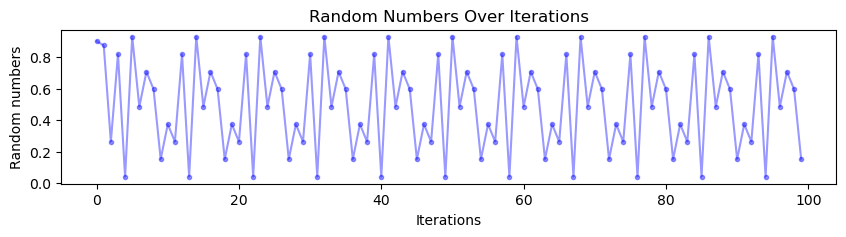


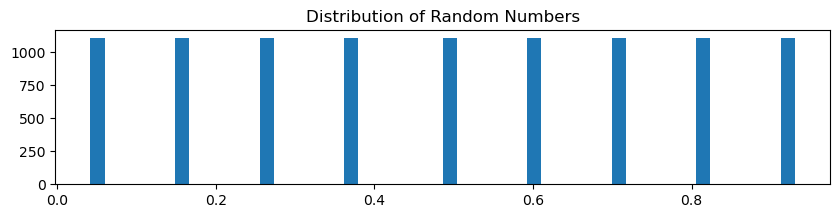




2.  $a=1140671485, \ \ b=12820163, \ \  m=2^{24}, \ \  z=124324$

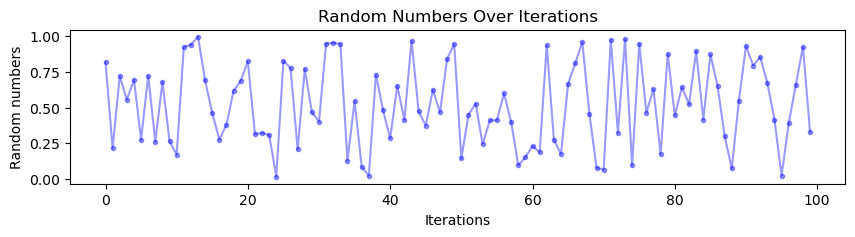


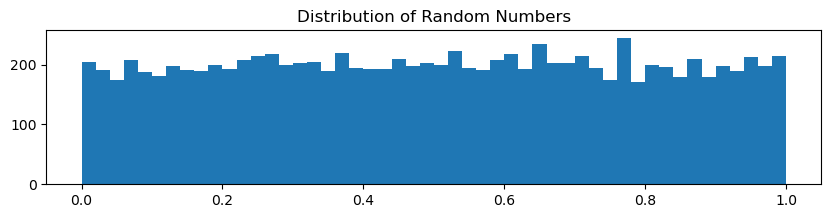


# Monte Carlo Estimation
---

$\int_a^bh(x)dx \approx \mathbb{E}[h(X)], X\sim U(0,1)$

1.  Implement function $h(x)$ on `function_h`
2.  Generate random numbers $\{x_1,\cdots,x_n\} \sim \mathcal{U}(0,1)$
3.  Return $\frac{1}{n}\sum_i^n h(x_i)$


Complete `function_h` and `MonteCarloEstimator.estimate_integral` by writing code under "`YOUR CODE HERE`".


In [82]:
def function_h(x):
    """
    Compute the function h(x) = (1 - x^2)^(3/2).

    Parameters:
        x : Input array of values for which the function will be computed.

    Returns:
        y (float) : Output array where each element is (1 - x^2)^(3/2) for the corresponding element in x.
    """

    ########################################################################
    #    YOUR CODE HERE
    ########################################################################


    return y


class MonteCarloEstimator():
    """
    Monte Carlo Estimator class for estimating the integral of a function
    using randomly generated samples.

    Attributes:
        n (int): Number of random numbers
        lcg (LinearCongruentialGenerator): A linear congruential generator instance 
    for generating uniform random samples.
    """
    
    def __init__(self, n, a=1140671485, b=12820163, m=2**24, z=124324):
        """
        Initialize the Monte Carlo estimator.

        Parameters:
            n (int): Number of random numbers. (influncing estimation precision and computing speed)
            a (int): Multiplier for the LCG.
            b (int): Increment for the LCG.
            m (int): Modulus for the LCG.
            z (int): Initial seed value for the LCG.
        """
        self.lgc = LinearCongruentialGenerator(a=a, b=b, m=m, z=z)
        self.n = n

    def estimate_integral(self, function_h):
        """
        Estimate the integral of the given function using Monte Carlo sampling.

        Parameters:
            function_h (callable): A function to integrate

        Returns:
            y (float): The Monte Carlo estimate of the integral of the function.
        """
        random_numbers = self.lgc.generate(self.n)
        ########################################################################
        #    YOUR CODE HERE
        ########################################################################
        
        
        return y




### Test your code!

In [83]:
mce = MonteCarloEstimator(10,)
integral_result =  mce.estimate_integral(function_h)
print(f"{integral_result:.6}")

0.581024


### Expected Results

$a=1140671485, \ \ b=12820163, \ \  m=2^{24}, \ \  z=124324$

1. when $n=10^8$, result: $0.589045$
2. when $n=10^6$, result: $0.588737$
3. when $n=10^4$, result: $0.587693$
4. when $n=10^2$, result: $0.563525$
5. when $n=10^2$, result: $0.581024$



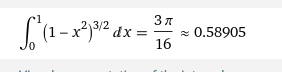


# Continous RV (Inverse Transform Method)
---

$p(x) = \lambda e^{-\lambda x}$.  
$y = P(x) = 1-e^{-\lambda x}$.  
$x = -\frac{ln(1-y)}{\lambda}, y \sim U(0,1)$


Implement `ExpenotialRandomNumberGenerator.inverse_transform` and `ExpenotialRandomNumberGenerator.generate`

In [99]:
class ExpenotialRandomNumberGenerator():
    """
    Generate random numbers from an exponential distribution 
    using the inverse transform method and a linear congruential generator (LCG) 
    as the uniform random source.

    Attributes:
        lambda_ (float): Parameter for expenotial distributions
        lcg (LinearCongruentialGenerator): A linear congruential generator instance 
    for generating uniform random samples.
    """
    
    def __init__(self, lambda_, a=1140671485, b=12820163, m=2**24, z=124324):
        """
        Initialize the Expenotial RandomNumber Generator .

        Parameters:
            lambda_ (float):  Parameter for expenotial distributions
            a (int): Multiplier for the LCG.
            b (int): Increment for the LCG.
            m (int): Modulus for the LCG.
            z (int): Initial seed value for the LCG.
        """
        self.lambda_ = lambda_
        self.lcg = LinearCongruentialGenerator(a,b,m,z)

    def inverse_transform(self, x):
        """
        Apply the inverse transform method to convert uniform random variables to 
        exponential random variables.

        Parameters:
            x : uniform random numbers.

        Returns:
            y : Transformed exponential random numbers.
        """

        ########################################################################
        #    YOUR CODE HERE
        ########################################################################

        return y


    def generate(self, n):
        """
        Generate n random numbers from an exponential distribution.

        Parameters:
            n (int) : The number of random numbers to generate.

        Returns:
            An array of n exponential random numbers.
        """
        ########################################################################
        #    YOUR CODE HERE
        ########################################################################

        
    
    
    @staticmethod
    def hist_random_numbers( random_numbers, lambda_, bins=40):
        plt.figure(figsize=(6,2))
        plt.hist(random_numbers, bins=bins, label=f'lambda: {lambda_}')
        plt.ylabel("Density")
        plt.xlabel("x")
        plt.xlim([-0.5,8])
        plt.legend()
        plt.show()


### Test your code!

In [105]:
lambda_ = 2
e_rg = ExpenotialRandomNumberGenerator(lambda_)
random_numbers = e_rg.generate(1000)

ExpenotialRandomNumberGenerator.hist_random_numbers(random_numbers, lambda_)

### Expected Results

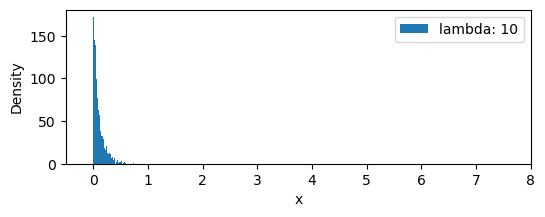


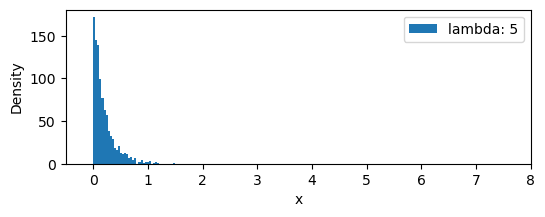


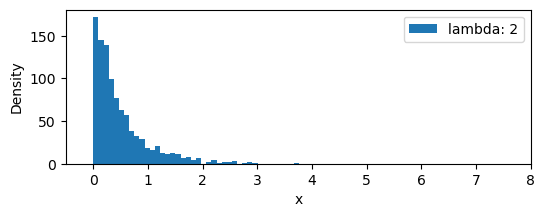

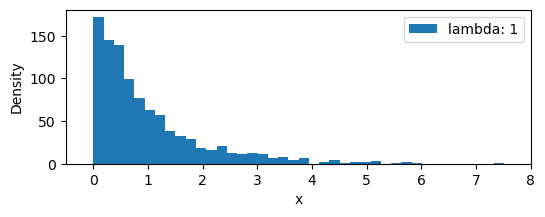


